# Лабораторная работа №1
# Градиентный спуск и его модификации

# Задание на лабораторную работу:

Выбрать тестовые функции оптимизации (2 шт)

Запрограммировать собственнуб реализацию классического градиентного спуска

Запрограммировать пайлайн тестирования алгоритма оптимизации

Визуализации функции и точки оптимума

Вычисление погрешности найденного решения в сравнение с аналитическим для нескольких запусков

Визуализации точки найденного решения (можно добавить анимацию на плюс балл)

Запрограммировать метод вычисления градиента

Передача функции градиента от пользователя

Символьное вычисление градиента (например с помощью sympy) (на доп балл)

Численная аппроксимация градиента (на доп балл)

Запрограммировать одну моментную модификацию и протестировать ее

Запрограммировать одну адаптивную модификацию и протестировать ее

Запрограммировать метод эфолюции темпа обучения и/или метод выбора начального приближения и протестировать их

# Для выполнения лабораторной работы были выбраны функция Розенброка и функция сферы

Реализация классического градиентоного спуска

In [1]:
import numpy as np

def compute_gradient(func, x):
  epsilon = 1e-6
  gradient = np.zeros_like(x)

  for i in range(len(x)):
    x_plus = np.copy(x)
    x_plus[i] += epsilon
    fx_plus = func(x_plus)

    x_minus = np.copy(x)
    x_minus[i] -= epsilon
    fx_minus = func(x_minus)

    gradient[i] = (fx_plus - fx_minus) / (2 * epsilon)
  return gradient.astype(np.float64)

In [2]:
def gradiend_descent(func, initial_point, learning_rate, num_itterations):
  point = initial_point
  for _ in range(num_itterations):
    gradient = compute_gradient(func, point)
    point = point - learning_rate * gradient
  return point

In [ ]:
Реализация пайплайна

In [3]:
def test_optimization_algo(func, optimisation_algo, initial_point, learning_rate, num_itterations):
  optimal_point = optimisation_algo(func, initial_point,learning_rate,num_itterations)
  error = np.abs(func(optimal_point))
  print("Точки оптимума",optimal_point)
  print("Значение функ",func(optimal_point))
  print("Погрешность ",error)

In [4]:
def rosenbrock(x):
  return -(1 - x[0])**2 - 100*(x[1] - x[0]**2)**2 #можно поменять 100 - это параметр

In [5]:
def sphere(x):
  return np.power(x[0],2) + np.power(x[1],2)
import matplotlib.pyplot as plt

Визуализация

In [6]:
def visualize_func(func,func_name):
  x = np.linspace(-2, 2, 100) # change
  y = np.linspace(-2, 2, 100) # change
  X, Y = np.meshgrid(x,y)
  Z = func([X,Y])

  fig = plt.figure()
  ax = fig.add_subplot(111, projection = '3d')
  ax.plot_surface(X,Y,Z)
  ax.set_xlabel('X')
  ax.set_ylabel('Y')
  ax.set_zlabel('Z')

  ax.set_title(func_name)
  plt.show()

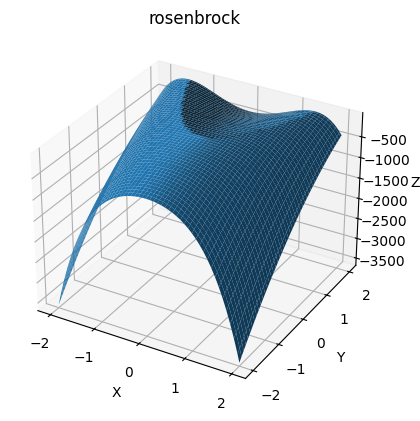

In [7]:
visualize_func(rosenbrock, 'rosenbrock')

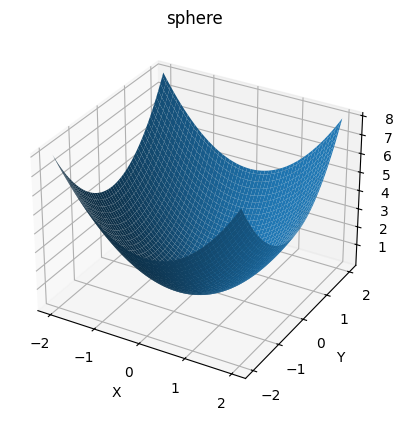

In [8]:
visualize_func(sphere, 'sphere')

In [9]:
def gradiend_descent(func, initial_point, learning_rate, num_itterations):
  point = initial_point
  trajectory = [point]
  for _ in range(num_itterations):
    gradient = compute_gradient(func, point)
    point = point - learning_rate * gradient
    trajectory.append(point)
  return point, trajectory

In [10]:
def visualize_optimization(func,optimization_algo, initial_point, learning_rate, num_itterations,func_name):
  x = np.linspace(-2, 2, 100) # change
  y = np.linspace(-2, 2, 100) # change
  X, Y = np.meshgrid(x,y)
  Z = func([X,Y])
  fig = plt.figure()
  ax = fig.add_subplot(111, projection = '3d')
  optimal_point, trajectory = optimization_algo(func,initial_point, learning_rate, num_itterations)
  trajectory = np.array(trajectory)

  ax.scatter(trajectory[:, 0], trajectory[:, 1], func(trajectory.T), color = 'r', s = 50)
  ax.scatter(optimal_point[0], optimal_point[1], func(optimal_point), color = 'g', s = 100)
  ax.set_xlabel('X')
  ax.set_ylabel('Y')
  ax.set_zlabel('Z')

  ax.set_title(func_name)

  plt.show()

Точки и погрешности

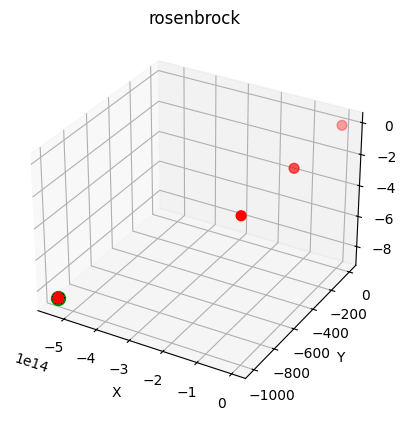

In [11]:
initial_point = np.array([1,1]) # change
learning_rate = 0.00001
num_itterations = 10000

visualize_optimization(rosenbrock, gradiend_descent, initial_point, learning_rate, num_itterations,'rosenbrock')


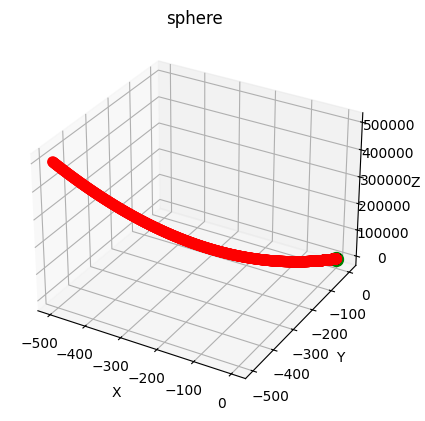

In [12]:
initial_point = np.array([1,1]) # change
learning_rate = 0.001
num_itterations = 100000

visualize_optimization(sphere, gradiend_descent, initial_point, learning_rate, num_itterations,'sphere')

In [13]:
initial_point = np.array([1,1]) # change
learning_rate = 0.0001
num_itterations = 10000

test_optimization_algo(rosenbrock, gradiend_descent, initial_point, learning_rate, num_itterations)
test_optimization_algo(sphere, gradiend_descent, initial_point, learning_rate, num_itterations)

Точки оптимума (array([-5.31927361e+27, -5.13799000e+05]), [array([1, 1]), array([-5049., -4999.]), array([-5.14946145e+09, -5.13799000e+05]), array([-5.31927361e+27, -5.13799000e+05]), array([-5.31927361e+27, -5.13799000e+05]), array([-5.31927361e+27, -5.13799000e+05]), array([-5.31927361e+27, -5.13799000e+05]), array([-5.31927361e+27, -5.13799000e+05]), array([-5.31927361e+27, -5.13799000e+05]), array([-5.31927361e+27, -5.13799000e+05]), array([-5.31927361e+27, -5.13799000e+05]), array([-5.31927361e+27, -5.13799000e+05]), array([-5.31927361e+27, -5.13799000e+05]), array([-5.31927361e+27, -5.13799000e+05]), array([-5.31927361e+27, -5.13799000e+05]), array([-5.31927361e+27, -5.13799000e+05]), array([-5.31927361e+27, -5.13799000e+05]), array([-5.31927361e+27, -5.13799000e+05]), array([-5.31927361e+27, -5.13799000e+05]), array([-5.31927361e+27, -5.13799000e+05]), array([-5.31927361e+27, -5.13799000e+05]), array([-5.31927361e+27, -5.13799000e+05]), array([-5.31927361e+27, -5.13799000e+05]

Моментная модификация

In [14]:
def momentum_gradient_descent(func, initial_point, learning_rate, num_itterations, momentum = 0.9):
  point = initial_point
  velocity = 0
  trajectory = [point]
  for _ in range(num_itterations):
    gradient = compute_gradient(func, point)
    velocity = momentum * velocity + learning_rate * gradient
    point = point - velocity
    trajectory.append(point)
  return point, trajectory

test_optimization_algo(rosenbrock,momentum_gradient_descent, initial_point, learning_rate, num_itterations)

Точки оптимума (array([-4.83570328e+28, -5.13799900e+06]), [array([1, 1]), array([-5049., -4999.]), array([-5.14946599e+09, -5.18299000e+05]), array([-4.83570328e+27, -9.80269000e+05]), array([-9.18783623e+27, -1.39604200e+06]), array([-1.31047559e+28, -1.77023770e+06]), array([-1.66299836e+28, -2.10701383e+06]), array([-1.98026885e+28, -2.41011235e+06]), array([-2.26581229e+28, -2.68290101e+06]), array([-2.52280139e+28, -2.92841081e+06]), array([-2.75409158e+28, -3.14936963e+06]), array([-2.96225275e+28, -3.34823257e+06]), array([-3.14959780e+28, -3.52720921e+06]), array([-3.31820835e+28, -3.68828819e+06]), array([-3.46995784e+28, -3.83325927e+06]), array([-3.60653239e+28, -3.96373324e+06]), array([-3.72944948e+28, -4.08115982e+06]), array([-3.84007486e+28, -4.18684374e+06]), array([-3.93963770e+28, -4.28195926e+06]), array([-4.02924426e+28, -4.36756324e+06]), array([-4.10989016e+28, -4.44460681e+06]), array([-4.18247147e+28, -4.51394603e+06]), array([-4.24779465e+28, -4.57635133e+06]

Адаптивная модификация

In [15]:
def adam_gradient_descent(func, initial_point, learning_rate, num_itterations, beta1 = 0.9, beta2 = 0.9, epsilon = 1e-8):
  point = initial_point
  m = np.zeros_like(point)
  v = np.zeros_like(point)

  for t in range(1, num_itterations + 1):
    gradient = compute_gradient(func, point)
    m = beta1 * m + (1 - beta1) * gradient
    v = beta2 * v + (1 - beta2) * gradient ** 2
    m_hat = m / (1 - beta1 ** t)
    v_hat = v / (1 - beta2 ** t)
    point = point - learning_rate * m_hat/ (np.sqrt(v_hat) + epsilon)
    trajectory.append(point)
  return point, trajectory

test_optimization_algo(rosenbrock,momentum_gradient_descent, initial_point, learning_rate, num_itterations)

Точки оптимума (array([-4.83570328e+28, -5.13799900e+06]), [array([1, 1]), array([-5049., -4999.]), array([-5.14946599e+09, -5.18299000e+05]), array([-4.83570328e+27, -9.80269000e+05]), array([-9.18783623e+27, -1.39604200e+06]), array([-1.31047559e+28, -1.77023770e+06]), array([-1.66299836e+28, -2.10701383e+06]), array([-1.98026885e+28, -2.41011235e+06]), array([-2.26581229e+28, -2.68290101e+06]), array([-2.52280139e+28, -2.92841081e+06]), array([-2.75409158e+28, -3.14936963e+06]), array([-2.96225275e+28, -3.34823257e+06]), array([-3.14959780e+28, -3.52720921e+06]), array([-3.31820835e+28, -3.68828819e+06]), array([-3.46995784e+28, -3.83325927e+06]), array([-3.60653239e+28, -3.96373324e+06]), array([-3.72944948e+28, -4.08115982e+06]), array([-3.84007486e+28, -4.18684374e+06]), array([-3.93963770e+28, -4.28195926e+06]), array([-4.02924426e+28, -4.36756324e+06]), array([-4.10989016e+28, -4.44460681e+06]), array([-4.18247147e+28, -4.51394603e+06]), array([-4.24779465e+28, -4.57635133e+06]

Эволюция темпла

In [22]:
import random

def evolution_learning_rate(func, initial_point, num_itterations, population_size, mutation_rate):
  population = [initial_point] * population_size
  best_point = initial_point

  for _ in range(num_itterations):
    fitness_values = [func(point) for point in population]
    best_index = fitness_values.index(min(fitness_values))
    best_point = population[best_index]

    for i in range(population_size):
      if random.random() < mutation_rate:
        population[i] = np.random.uniform(-2, -2, size = 2)
      else:
        population[i] = best_point
  return best_point